<a href="https://colab.research.google.com/github/satishchaudhary382/RFM/blob/master/hma%2Bbacktest%2Bindexv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# !pip install selenium
# !apt-get update 
# !apt install chromium-chromedriver
# !pip install pandas_ta
# !pip install MarketProfile
import time
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

from selenium import webdriver



In [25]:
#stocks = ['mnbbl','jbbl','edbl','mlbl','shine','sadbl', 'sindu','sapdbl','mdb','lbbl','gbbl']#,'mnbbl','jbbl','ahpc','eic']
# stocks = ['glicl','licn','nlic','plic','slicl']
stocks = ['eic','hgi','igi','nil','nicl','nlg','sic','sicl','picl']

In [26]:
for stock in stocks:
    #loading necessary driver
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
  driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

  url = f"https://www.nepalipaisa.com/CompanyDetail.aspx?quote={stock}"
  driver.get(url)
  driver.find_elements_by_xpath("//li[@title='pricehistory']//a[1]")[0].click()
  datefield = driver.find_elements_by_xpath("//input[@class='sfInputbox hasDatepicker']")
  datefield[0].click()
  datefield[0].clear()
  datefield[0].send_keys("2019-7-22")
  search_btn = driver.find_element_by_xpath("(//input[@class='sfBtn sfPrimaryBtn'])[2]")
  search_btn.click()


  # Extracting Heading 
  heading = []
  for i in range(1,12):
    h = driver.find_elements_by_xpath(f'//*[@id="tblFloorList"]/thead/tr/th[{i}]')
    for j in h:
      heading.append(j.text)

  #Identifying number of data 
  w = []
  b = driver.find_elements_by_xpath(f'//*[@id="tblFloorList"]/tbody')
  for a in b:
    w.append(a.text)

  c = []
  for i in w:
    c.append(i.split("\n"))


  body = []
  for i in range(0,pd.to_numeric(c[-1][-1].split()[0])):
    b = driver.find_elements_by_xpath(f'//*[@id="tblFloorList"]/tbody/tr[{i}]')
    for a in b:
      body.append(a.text)

  driver.quit()

  data = []
  for i in body:
    data.append(i.split())

  #Creating dataFrame
  df = pd.DataFrame(data, columns = heading)

  df[['S.N.', 'No of Transactions', 'Max Price', 'Min Price', 'Closing Price', 'Traded Shares', 'Total Amount', 'Prev. Closing', 'Difference Rs.', '% Change']] = df[['S.N.',  'No of Transactions', 'Max Price', 'Min Price', 'Closing Price', 'Traded Shares', 'Total Amount', 'Prev. Closing', 'Difference Rs.', '% Change']].apply(pd.to_numeric)
  df['Date'] = df['Date'].apply(pd.to_datetime)
  df.set_index("Date", inplace= True)

  df[['Closing Price','Min Price', 'Closing Price']].replace(to_replace=0, method='bfill', inplace = True)

  df.sort_values(by = "Date", ascending = True, inplace = True)

  df.to_csv(f"{stock}")

  heading = None
  w = None
  c = None
  body = None
  data = None
  

In [27]:
def Signal(df):
  if df['hma1'] > df['hma2']:
    return "Sell"
  elif df['hma1'] < df['hma2']:
    return "Buy"

import pandas_ta as ta
for i in stocks:
  df = pd.read_csv(f"/content/{i}")
  df['hma1']  = ta.hma(df['Closing Price'],30)
  df['hma2'] = ta.hma(df['Closing Price'].shift(-1),30)
  df['Signal'] = df.apply(Signal, axis = 1)
  print(f"{i} Signals are {df['Signal'].values[-15:-1] }@ {df['Closing Price'].values[-15:-1]}")


eic Signals are ['Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell'
 'Sell' 'Sell' 'Sell' 'Sell']@ [558 547 543 540 543 532 534 532 528 524 523 529 534 530]
hgi Signals are ['Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell'
 'Sell' 'Sell' 'Sell' 'Sell']@ [524 517 513 517 516 510 510 504 501 503 496 500 504 506]
igi Signals are ['Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell'
 'Sell' 'Sell' 'Sell' 'Buy']@ [558 553 550 548 535 527 534 532 524 520 518 528 538 539]
nil Signals are ['Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell'
 'Sell' 'Sell' 'Sell' 'Sell']@ [838 828 816 822 820 815 810 804 793 791 791 806 806 810]
nicl Signals are ['Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell'
 'Sell' 'Sell' 'Sell' 'Sell']@ [570 561 555 562 556 549 547 545 540 540 534 549 549 553]
nlg Signals are ['Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell' 'Sell'
 'Sell' 'Buy' 'Buy' 'Buy']@ [730 

Back Testing the result

In [85]:
source = pd.read_csv("/content/sicl")
source['hma1'] = ta.hma(source['Closing Price'],30)
source['hma2'] = ta.hma(source['Closing Price'].shift(-1),30)

In [86]:
def signal(source):
  if source.hma1<source.hma2:
    return 1
  else:
    return -1
source['Signal'] = source.apply(signal, axis=1)
source.set_index('Date',inplace = True)

In [87]:
source['S'] = (source['Signal']-source['Signal'].shift(1))

In [88]:
initial_capital = 30000
initial = 0
buy = 0
b = 0

r = []
for i in range(len(source)):
  if source['S'][i] == 2:
    buy_unit = initial_capital//source['Closing Price'][i]
    buy += buy_unit
    initial = initial_capital - (buy_unit * source['Closing Price'][i])
    initial_capital -= initial
    b += source['Closing Price'][i]
    d = (source.index[i])
    print(f"Stock was bought on {source.index[i]} at {source['Closing Price'][i]}. Unit in stock {buy}. Remaining amount {initial}") 
  elif (source['S'][i] == -2) and (buy >0):
    sell = buy * source['Closing Price'][i] 
    buy = 0
    net = initial + (sell* source['Closing Price'][i])
    print(f"Stock was sold on {source.index[i]} at {source['Closing Price'][i]}. Return {np.round(source['Closing Price'][i]/b,3)}")#. Time {source.index[i] - d}")
    r.append(source['Closing Price'][i]/b)
    b= 0
    d= 0

Stock was bought on 2019-10-02 at 715. Unit in stock 41. Remaining amount 685
Stock was sold on 2019-11-16 at 733. Return 1.025
Stock was bought on 2019-11-25 at 738. Unit in stock 39. Remaining amount 533
Stock was sold on 2019-11-30 at 740. Return 1.003
Stock was bought on 2019-12-02 at 736. Unit in stock 39. Remaining amount 78
Stock was sold on 2019-12-28 at 850. Return 1.155
Stock was bought on 2020-01-07 at 860. Unit in stock 33. Remaining amount 324
Stock was sold on 2020-02-25 at 1180. Return 1.372
Stock was bought on 2020-06-29 at 907. Unit in stock 31. Remaining amount 263
Stock was sold on 2020-08-11 at 1245. Return 1.373
Stock was bought on 2020-08-24 at 1245. Unit in stock 22. Remaining amount 727
Stock was sold on 2020-09-21 at 1335. Return 1.072
Stock was bought on 2020-10-17 at 1331. Unit in stock 20. Remaining amount 770
Stock was sold on 2020-10-21 at 1338. Return 1.005


In [92]:
1.025*1.003*1.155*1.372*1.373*1.072*1.005

2.4098625815981545

In [96]:
1.50*100000

150000.0

In [28]:
for i in stocks:
  df = pd.read_csv(f"/content/{i}")
  print(f"Standard deviation of {i} is {df['Closing Price'].std()} ")

Standard deviation of eic is 106.46375610187434 
Standard deviation of hgi is 88.04626515241863 
Standard deviation of igi is 93.48576116418353 
Standard deviation of nil is 158.154019363292 
Standard deviation of nicl is 107.58995070743013 
Standard deviation of nlg is 86.20051700424519 
Standard deviation of sic is 162.87043558161463 
Standard deviation of sicl is 234.25292423490143 
Standard deviation of picl is 75.09121324981108 


In [29]:
df = pd.read_csv(f"/content/slicl")
# df = df[:174]
df['hma1']  = ta.hma(df['Closing Price'],14)
df['hma2'] = ta.hma(df['Closing Price'].shift(-1),14)

In [30]:

df['Closing Price'].std()

124.38181732047768

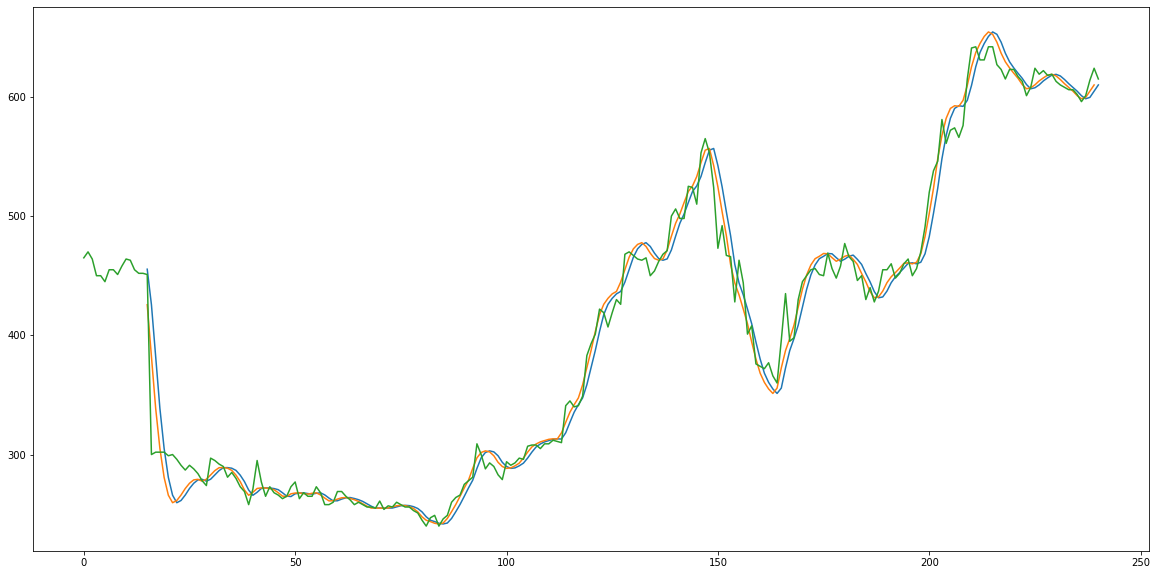

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plt.plot(df['hma1'])
plt.plot(df['hma2'])
plt.plot(df['Closing Price'])

In [76]:
index = pd.read_csv("/content/index",sep = "\t")
# df = pd.read_csv("/content/jbbl")

In [77]:
index['Date'] = pd.to_datetime(index.Date)
df['Date'] = pd.to_datetime(df.Date)


In [78]:
index_ret = index['non life insurance Sub-Index Value'].pct_change()[1:]
df_ret = df['Closing Price'].pct_change()[1:]

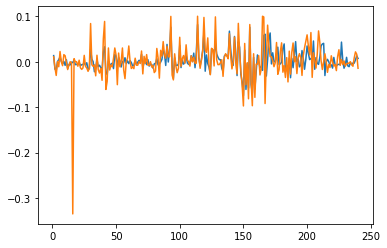

In [79]:
index_ret[:len(df)-1].plot()
df_ret.plot()

In [80]:
import statsmodels.api as sm
from statsmodels import regression 

def linreg(x,y):
  x = sm.add_constant(x)
  model = regression.linear_model.OLS(y,x).fit()
  x = x[:,1]
  return model.params[0],model.params[1]


In [81]:
r = pd.merge(df, index, 
         on = "Date", 
         how = "inner")
r = r[['Date','Closing Price','non life insurance Sub-Index Value']]

In [82]:
alpha,beta = linreg(r['Closing Price'].pct_change()[1:].values, r['non life insurance Sub-Index Value'].pct_change()[1:].values)

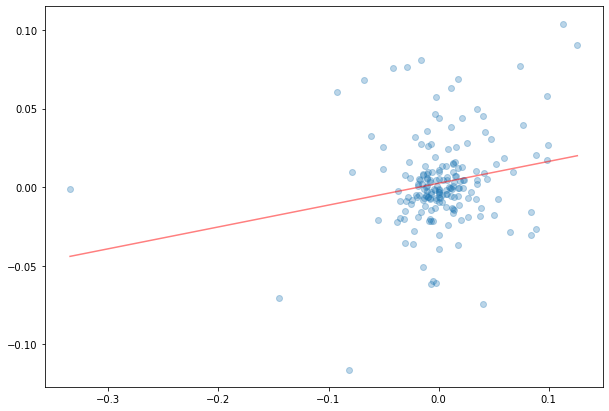

In [83]:
X2 = np.linspace(r['Closing Price'].pct_change()[1:].values.max(),r['Closing Price'].pct_change()[1:].values.min(),100)
Y_hat = X2 *beta + alpha

plt.figure(figsize = (10,7))
plt.scatter(r['Closing Price'].pct_change()[1:].values,r['non life insurance Sub-Index Value'].pct_change()[1:].values, alpha = 0.3)
plt.plot(X2, Y_hat,'r', alpha = 0.5)

In [84]:
for stock in stocks:
  index = pd.read_csv("/content/index",sep = "\t")
  df = pd.read_csv(f"/content/{stock}")

  index['Date'] = pd.to_datetime(index.Date)
  df['Date'] = pd.to_datetime(df.Date)

  index_ret = index['non life insurance Sub-Index Value'].pct_change()[1:]
  df_ret = df['Closing Price'].pct_change()[1:]

  r = pd.merge(df, index, 
         on = "Date", 
         how = "inner")
  r = r[['Date','Closing Price','non life insurance Sub-Index Value']]

  alpha,beta = linreg(r['Closing Price'].pct_change()[1:].values, r['non life insurance Sub-Index Value'].pct_change()[1:].values)

  print(f"{stock} alpha: {alpha} and beta: {beta}")

eic alpha: 0.0021273479571762084 and beta: 0.26358302184572496
hgi alpha: 0.0021376951565544003 and beta: 0.285388251905569
igi alpha: 0.002315813886759463 and beta: 0.2217380142126648
nil alpha: 0.002433543276512205 and beta: 0.11814910906938043
nicl alpha: 0.0024532545486869615 and beta: 0.12554432902975868
nlg alpha: 0.0026466405527773053 and beta: 0.2253531972152268
sic alpha: 0.0019086234816526036 and beta: 0.3659978528841031
sicl alpha: 0.0020880283508372746 and beta: 0.2342173394181452
picl alpha: 0.0027703290571871883 and beta: 0.17178856413919338
